train_size 81
12
(12, 832) (12, 6)
data shape (204, 6) (204, 832)
data_size 204 204


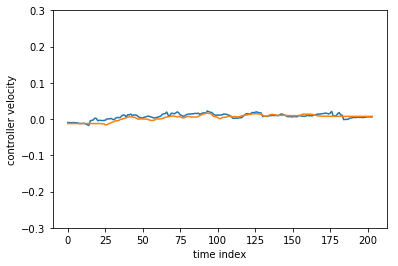

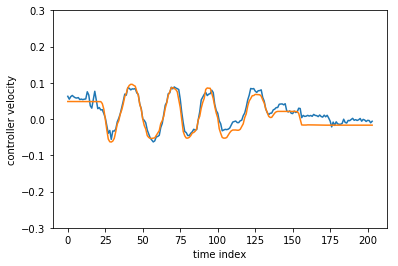

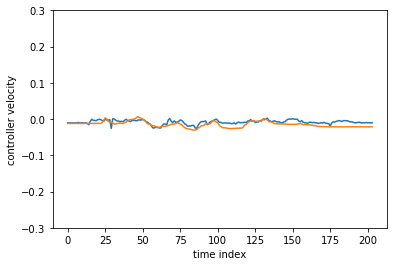

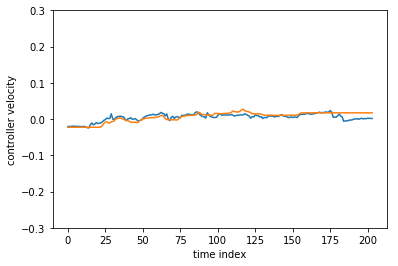

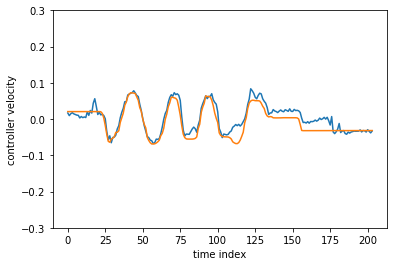

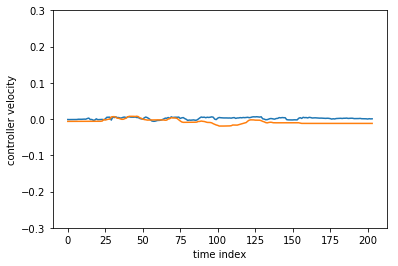

In [3]:
import os, cv2
import matplotlib.pyplot as plt
from regression import *

data_name = '/home/rmqlife/work/data/2017-09-09-11-08-00/x.npz'
data_name = '/home/rmqlife/work/data/2017-09-09-11-06-56/data2.npz'
#data_name = '/home/rmqlife/work/data/towelfolding_2017-09-17-15-22-41/x.npz'
#data_name = '/home/rmqlife/work/data/data_0917-1454.npz'
#data_name = '/home/rmqlife/work/data/2017-09-05-19-14-52.half/x.npz'
data_name = '/home/rmqlife/work/data/data_0917-2011.npz'
data_name = '/home/rmqlife/work/data/npz/data_0814-1509.npz'
data_name = '/home/rmqlife/work/data/videos/npz/data_0918-2117.npz'

data = np.load(data_name)
pos = data['pos']
feat = data['feat']

prop = 0.4
train_size = int(len(pos)*prop)
print "train_size", train_size

model = load_model_data(pos[:train_size], feat[:train_size], num_samples=0.3, alpha=0.000001)
print 'data shape', pos.shape,feat.shape
# Use the model to predict the velocity/direction of end effector
target = 50  # target index  
X = feat - feat[target]
y = pos - pos[target]
y_pred = model.predict(X)

print "data_size", len(y), len(y_pred)
for i in range(y_pred.shape[1]):
    axes = plt.gca()
    axes.set_xlabel('time index')
    axes.set_ylabel('controller velocity')
    axes.set_ylim([-0.3,0.3])
    plt.plot(range(y_pred.shape[0]),y_pred[:,i], label = 'predicted')
    plt.plot(range(y.shape[0]),y[:,i], label = 'ground truth')
    plt.show()
    


(3, 832)
104
(104, 832) (104, 6)
data shape (209, 6) (209, 832)
(0,) (209, 6)


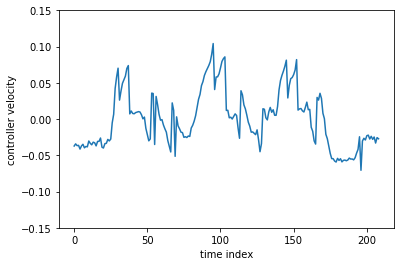

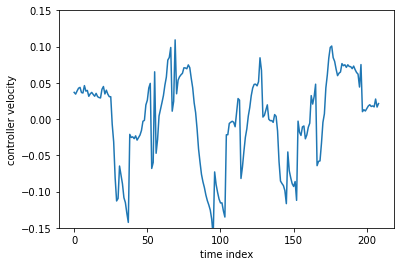

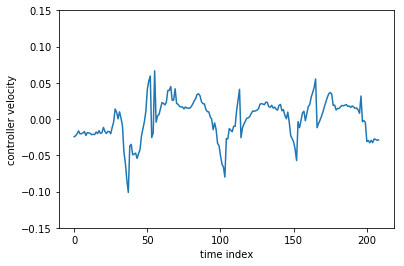

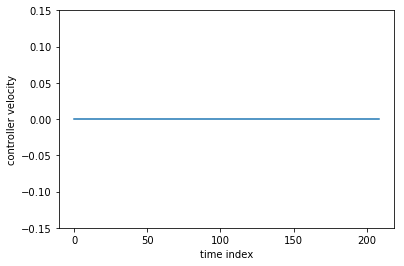

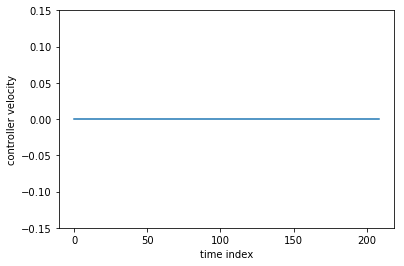

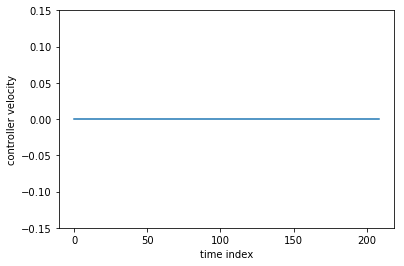

In [20]:
from sklearn.cluster import KMeans
import numpy as np
from regression import *
data_name = '/home/rmqlife/work/data/towelfolding_2017-09-17-15-22-41/x.npz'
data_name = '/home/rmqlife/work/data/data_0917-2003.npz'

data_gb = np.load(data_name)
pos = data_gb['pos']
feat = data_gb['feat']


X = feat
y = pos
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
#kmeans.predict([[0, 0], [4, 4]])
# print kmeans.labels_
centers = kmeans.cluster_centers_
print centers.shape
prop = 0.5
train_size = int(len(pos)*prop)
model = load_model_data(pos[:train_size], feat[:train_size], num_samples=2, alpha=0.000001)
print 'data shape', pos.shape,feat.shape

tt_y = np.array([])
tt_y_pred = np.array([])

for i in range(X.shape[0]):
    x = np.array(X[i,:]).reshape(1,-1)
    cid = kmeans.predict(x) # cluster id
    x_center = np.array(centers[cid,:])
    d_center = (x-x_center).reshape(1,-1)
    y_pred_center = model.predict(d_center).ravel()
    tt_y_pred = np.vstack((tt_y_pred, y_pred_center)) if tt_y_pred.size else y_pred_center

print tt_y.shape, tt_y_pred.shape

for i in range(tt_y_pred.shape[1]):
    axes = plt.gca()
    axes.set_xlabel('time index')
    axes.set_ylabel('controller velocity')
    axes.set_ylim([-0.15,0.15])
    plt.plot(range(tt_y_pred.shape[0]),tt_y_pred[:,i], label = 'predicted')
    plt.show()

In [5]:
import numpy as np
from regression import *
from util import *
import cv2

data_name = '/home/rmqlife/work/data/towelfolding_2017-09-17-15-22-41/x.npz'
#data_name = '/home/rmqlife/work/data/data_0917-2003.npz'
#data_name = '/home/rmqlife/work/data/2017-09-09-11-06-56/data2.npz'
data = np.load(data_name)
pos = data['pos']
feat = data['feat']



goals = find_goals(pos,1,10)

#print dist_thresh = np.mean(np.abs(dists[:-1]-dists[1:]))

prop = 0.5
train_size = int(len(pos)*prop)
model = load_model_data(pos[:train_size], feat[:train_size], num_samples=2, alpha=0.00001)

for i in range(feat.shape[0]):
    print 'goals',goals
    if len(goals)==0:
        print "achived"
    else:
        goal = goals[0]
        x = np.array(feat[i,:]-feat[goal,:]).reshape(1,-1)
        y = pos[i,:]-pos[goal,:]
        y_pred = model.predict(x)
        # reached a sub-goal
        if dist2(y_pred)<2e-2:
            goals.pop(0)

479
(479, 832) (479, 6)
goals [189, 669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537, 299, 716, 583]
goals [669, 812, 489, 225, 386, 537

goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299, 716, 583]
goals [299

In [8]:
a = 1e-2
print a

0.01
